In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
dataset_path = "dataset/"
film_data_path = dataset_path + "films.csv"
films = pd.read_csv(film_data_path)


In [29]:
target_film = films.loc[films["Film"] == "The Imitation Game"]
target_film

,Film,IMDB,Biografski,Drama,Triler,Komedija,Misterija
0,The Imitation Game,8.0,1,1,1,0,0


Index(['Film', 'IMDB', 'Biografski', 'Drama', 'Triler', 'Komedija',
       'Misterija'],
      dtype='object')

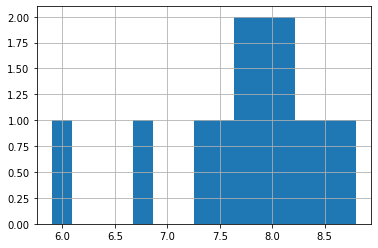

In [33]:
films["IMDB"].hist(bins=15)
plt.show()